# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


In [12]:
def cal_slope(xs, ys):
    
    x_2 = [xs[i]**2 for i in range(len(X))]
    x_y = [xs[i]*ys[i] for i in range(len(X))]

    num = np.mean(xs)*np.mean(ys) - np.mean(x_y)
    den = np.mean(xs)**2 - np.mean(x_2)
    slope = num/den
    
    return slope

def best_fit(xs,ys):
    
    slope = cal_slope(xs,ys)
    inter = np.mean(ys) - slope*np.mean(xs)
    
    return slope, inter

def reg_line (m, c, xs):
    
    yp = [m*x + c for x in xs]
#     for i in range(0,len(xs)): 
#         yp = m*xs[i] + c 
        
    return yp

def sq_err(y_a, y_b):
    
    diff = [(y_a[i]-y_b[i])**2 for i in range(len(y_a))]
    diff_sum = sum(diff)

    return diff_sum

def r_squared(y_real, y_predicted):
    
    mean = np.mean(y_real)
    y_mean = [mean for i in range(len(y_real))] 
    SST = sq_err(y_real,y_mean)
    SSE = sq_err(y_real,y_predicted)
    
    r_value = 1- SSE/SST

    return r_value


In [13]:

m, c = best_fit(X,Y)
y_predicted = reg_line(m,c,X)
r_value = r_squared(Y, y_predicted)


Basic Regression Diagnostics
------------------------------
Slope: 0.56
Y-Intercept 6.33
R-squared 0.97
------------------------------
Model: Y = 0.56 * X + 6.33


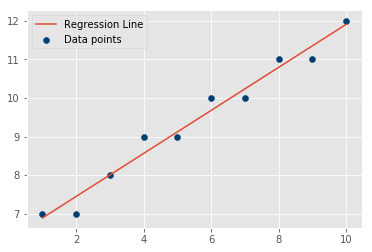

In [15]:
print("Basic Regression Diagnostics")
print("------------------------------")
print('Slope:', round(m,2))
print('Y-Intercept', round(c,2))
print('R-squared', round(r_value,2))
print('------------------------------')
print ('Model: Y =',round(m,2),'* X +', round(c,2))

plt.scatter(X,Y,color='#003F72', label="Data points")
plt.plot(X, y_predicted, label= "Regression Line")
plt.legend()
plt.show()
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

In [18]:
# Make prediction using given value and visualize on the scatter plot
x = 4.5
y_pred = x*m + c


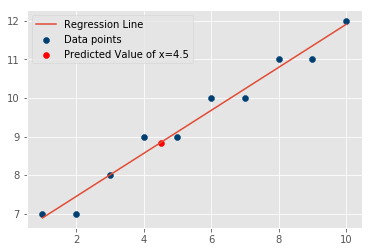

In [19]:
plt.scatter(X,Y,color='#003F72', label="Data points")
plt.plot(X, y_predicted, label= "Regression Line")
plt.scatter(x, y_pred, color='red', label='Predicted Value of x=4.5')
plt.legend()
plt.show()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [21]:
import pandas as pd

df = pd.read_csv('heightweight.csv')

In [22]:
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [27]:
x_height = df['height']
y_height = df['weight']

m, c = best_fit(x_height,y_height)
y_predheight = reg_line(m,c,x_height)
r_value = r_squared(y_height, y_predheight)

Basic Regression Diagnostics
------------------------------
Slope: 5.77
Y-Intercept -220.24
R-squared 0.95
------------------------------
Model: Y = 5.77 * X + -220.24


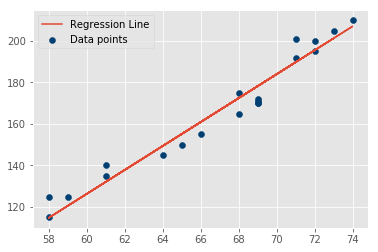

In [28]:
print("Basic Regression Diagnostics")
print("------------------------------")
print('Slope:', round(m,2))
print('Y-Intercept', round(c,2))
print('R-squared', round(r_value,2))
print('------------------------------')
print ('Model: Y =',round(m,2),'* X +', round(c,2))

plt.scatter(x_height,y_height,color='#003F72', label="Data points")
plt.plot(x_height, y_predheight, label= "Regression Line")
plt.legend()
plt.show()